# Learn More

This section briefly showcases some examples of Python for scientific
programming.

-   All of these topics will be covered in detail later on.

## Numerical Programming

Fundamental matrix and array processing capabilities are provided by the
excellent [NumPy](http://www.numpy.org/) library.

NumPy provides the basic array data type plus some simple processing
operations.

For example, let\'s build some arrays

In [1]:
import numpy as np                     # Load the library

a = np.linspace(-np.pi, np.pi, 100)    # Create even grid from -π to π
b = np.cos(a)                          # Apply cosine to each element of a
c = np.sin(a)                          # Apply sin to each element of a

Now let\'s take the inner product

In [2]:
b @ c

4.04891256782214e-16

The number you see here might vary slightly but it\'s essentially zero.

(For older versions of Python and NumPy you need to use the
[np.dot](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)
function)

The [SciPy](http://www.scipy.org) library is built on top of NumPy and
provides additional functionality.

(tuple_unpacking_example)=
For example, let\'s calculate $\int_{-2}^2 \phi(z) dz$ where $\phi$ is
the standard normal density.

In [3]:
from scipy.stats import norm
from scipy.integrate import quad

ϕ = norm()
value, error = quad(ϕ.pdf, -2, 2)  # Integrate using Gaussian quadrature
value

0.9544997361036417

SciPy includes many of the standard routines used in

-   [linear algebra](http://docs.scipy.org/doc/scipy/reference/linalg.html)
-   [integration](http://docs.scipy.org/doc/scipy/reference/integrate.html)
-   [interpolation](http://docs.scipy.org/doc/scipy/reference/interpolate.html)
-   [optimization](http://docs.scipy.org/doc/scipy/reference/optimize.html)
-   [distributions and random number generation](http://docs.scipy.org/doc/scipy/reference/stats.html)
-   [signal processing](http://docs.scipy.org/doc/scipy/reference/signal.html)

See them all [here](http://docs.scipy.org/doc/scipy/reference/index.html).

## Graphics

The most popular and comprehensive Python library for creating figures
and graphs is [Matplotlib](http://matplotlib.org/), with functionality
including

-   plots, histograms, contour images, 3D graphs, bar charts etc.
-   output in many formats (PDF, PNG, EPS, etc.)
-   LaTeX integration

Example 2D plot with embedded LaTeX annotations

```{figure} /_static/lecture_specific/about_py/qs.png
:scale: 55%
:figclass: align-center
```

Example contour plot

```{figure} /_static/lecture_specific/about_py/bn_density1.png
:scale: 55%
:figclass: align-center
```

Example 3D plot

```{figure} /_static/lecture_specific/about_py/career_vf.png
:scale: 80%
:figclass: align-center
```

More examples can be found in the [Matplotlib thumbnail
gallery](http://matplotlib.org/gallery.html).

Other graphics libraries include

-   [Plotly](https://plot.ly/python/)
-   [Bokeh](http://bokeh.pydata.org/en/latest/)
-   [VPython](http://www.vpython.org/) --- 3D graphics and animations

## Symbolic Algebra

It\'s useful to be able to manipulate symbolic expressions, as in
Mathematica or Maple.

The [SymPy](http://www.sympy.org/) library provides this functionality
from within the Python shell.

In [4]:
from sympy import Symbol

x, y = Symbol('x'), Symbol('y')  # Treat 'x' and 'y' as algebraic symbols
x + x + x + y

3*x + y

We can manipulate expressions

In [5]:
expression = (x + y)**2
expression.expand()

x**2 + 2*x*y + y**2

solve polynomials

In [6]:
from sympy import solve

solve(x**2 + x + 2)

[-1/2 - sqrt(7)*I/2, -1/2 + sqrt(7)*I/2]

and calculate limits, derivatives and integrals

In [7]:
from sympy import limit, sin, diff

limit(1 / x, x, 0)

oo

In [8]:
limit(sin(x) / x, x, 0)

1

In [9]:
diff(sin(x), x)

cos(x)

The beauty of importing this functionality into Python is that we are
working within a fully fledged programming language.

We can easily create tables of derivatives, generate LaTeX output, add
that output to figures and so on.

## Statistics

Python\'s data manipulation and statistics libraries have improved
rapidly over the last few years.

### Pandas

One of the most popular libraries for working with data is
[pandas](http://pandas.pydata.org/).

Pandas is fast, efficient, flexible and well designed.

Here\'s a simple example, using some dummy data generated with Numpy\'s
excellent `random` functionality.

In [10]:
import pandas as pd
np.random.seed(1234)

data = np.random.randn(5, 2)  # 5x2 matrix of N(0, 1) random draws
dates = pd.date_range('28/12/2010', periods=5)

df = pd.DataFrame(data, columns=('price', 'weight'), index=dates)
print(df)

               price    weight
2010-12-28  0.471435 -1.190976
2010-12-29  1.432707 -0.312652
2010-12-30 -0.720589  0.887163
2010-12-31  0.859588 -0.636524
2011-01-01  0.015696 -2.242685


In [11]:
df.mean()

price     0.411768
weight   -0.699135
dtype: float64

### Other Useful Statistics Libraries

-   [statsmodels](http://statsmodels.sourceforge.net/) --- various
    statistical routines

-   [scikit-learn](http://scikit-learn.org/) --- machine learning in
    Python (sponsored by Google, among others)

-   [pyMC](http://pymc-devs.github.io/pymc/) --- for Bayesian data
    analysis

-   [pystan](https://pystan.readthedocs.org/en/latest/) Bayesian
    analysis based on [stan](http://mc-stan.org/)

## Networks and Graphs

Python has many libraries for studying graphs.

One well-known example is [NetworkX](http://networkx.github.io/). Its
features include, among many other things:

-   standard graph algorithms for analyzing networks
-   plotting routines

Here\'s some example code that generates and plots a random graph, with
node color determined by shortest path length from a central node.

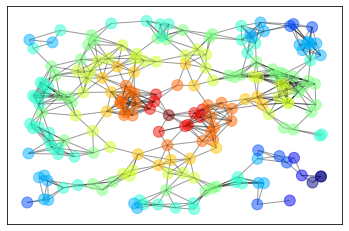

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1234)

# Generate a random graph
p = dict((i, (np.random.uniform(0, 1), np.random.uniform(0, 1)))
         for i in range(200))
g = nx.random_geometric_graph(200, 0.12, pos=p)
pos = nx.get_node_attributes(g, 'pos')

# Find node nearest the center point (0.5, 0.5)
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in list(pos.values())]
ncenter = np.argmin(dists)

# Plot graph, coloring by path length from central node
p = nx.single_source_shortest_path_length(g, ncenter)
plt.figure()
nx.draw_networkx_edges(g, pos, alpha=0.4)
nx.draw_networkx_nodes(g,
                       pos,
                       nodelist=list(p.keys()),
                       node_size=120, alpha=0.5,
                       node_color=list(p.values()),
                       cmap=plt.cm.jet_r)
plt.show()

## Cloud Computing

Running your Python code on massive servers in the cloud is becoming
easier and easier.

A nice example is [Anaconda Enterprise](https://www.anaconda.com/enterprise/).

See also

-   [Amazon Elastic Compute Cloud](http://aws.amazon.com/ec2/)
-   The [Google App Engine](https://cloud.google.com/appengine/)
    (Python, Java, PHP or Go)
-   [Pythonanywhere](https://www.pythonanywhere.com/)
-   [Sagemath Cloud](https://cloud.sagemath.com/)